In [1]:
import numpy as np

In [2]:
from scipy.linalg import expm

In [28]:
A = np.array([
    [0, 1],
    [-100, -10]
])

In [38]:
W = np.array([
    [0 , 0],
    [0 , 1]
])

In [39]:
np.zeros((2, 2)).shape

(2, 2)

In [40]:
W

array([[0, 0],
       [0, 1]])

In [41]:
Z = np.block([
    [-A, W],
    [np.zeros((2, 2)), np.transpose(A)]
])

In [42]:
Z

array([[   0.,   -1.,    0.,    0.],
       [ 100.,   10.,    0.,    1.],
       [   0.,    0.,    0., -100.],
       [   0.,    0.,    1.,  -10.]])

In [44]:
expz = expm(0.2 * Z)

In [54]:
expz

array([[-1.98547827, -0.30980807, -0.00106803, -0.01339401],
       [30.98080705,  1.11260243,  0.01339401,  0.06906538],
       [ 0.        ,  0.        ,  0.15057437, -4.1927963 ],
       [ 0.        ,  0.        ,  0.04192796, -0.26870526]])

In [56]:
not_q = expz[:2, 2:]
not_q

array([[-0.00106803, -0.01339401],
       [ 0.01339401,  0.06906538]])

In [57]:
F

array([[ 0.15057437,  0.04192796],
       [-4.1927963 , -0.26870526]])

In [58]:
np.matmul(F,  not_q)

array([[0.00040077, 0.00087898],
       [0.00087898, 0.0376001 ]])

In [15]:
np.set_printoptions(suppress=True)

In [16]:
expm(0.2 * z)

array([[ 0.15057437,  0.04192796,  0.00035827,  0.00240143],
       [-4.1927963 , -0.26870526,  0.00240143, -0.01791368],
       [ 0.        ,  0.        ,  0.15057437, -4.1927963 ],
       [ 0.        ,  0.        ,  0.04192796, -0.26870526]])

In [18]:
not_q = np.array([
    [0.00035827,  0.00240143],
    [0.00240143, -0.01791368]
])

In [21]:
np.linalg.inv(F)

array([[-1.98547827, -0.30980807],
       [30.98080705,  1.11260243]])

In [22]:
np.matmul(np.linalg.inv(F), not_q)

array([[-0.00145532,  0.00078182],
       [ 0.01377133,  0.05446744]])

In [23]:
np.matmul(np.array([[0],[1]]), np.array([[0, 1]]))

array([[0, 0],
       [0, 1]])

In [64]:
H = np.array([
    [1],
    [1]
])
R = np.array([
    [1 , 0],
    [0, 0.25]
])

In [65]:
np.linalg.inv(np.matmul(np.matmul(np.transpose(H), R), H))

array([[0.8]])

In [66]:
np.linalg.inv(R)

array([[1., 0.],
       [0., 4.]])

In [67]:
0.8 * 0.25

0.2

In [68]:
steel_data = [66.6,84.9,88.6,78.0,96.8, 105.2,93.2, 111.6,88.3,117.0, 115.2 ]

### Problem 3

In [77]:
y = np.array([steel_data])
y=y.transpose()
y

array([[ 66.6],
       [ 84.9],
       [ 88.6],
       [ 78. ],
       [ 96.8],
       [105.2],
       [ 93.2],
       [111.6],
       [ 88.3],
       [117. ],
       [115.2]])

In [88]:
x_vec = np.linspace(0, 10, 11)
x_vec = np.array([x_vec])
x_vec = x_vec.transpose()
x_vec

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

### Linear

In [134]:
X = np.block([x_vec ** 0, x_vec])

In [135]:
z_vec = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
z_vec

array([[75.30454545],
       [ 3.94636364]])

In [136]:
y_lin = [z_vec[1] * x + z_vec[0] for x in x_vec]

In [137]:
x=11
predicted_lin = z_vec[0] + z_vec[1] * x 
predicted_lin

array([118.71454545])

In [138]:
import matplotlib.pyplot as plt

Text(0,0.5,'Millions of tons of steel')

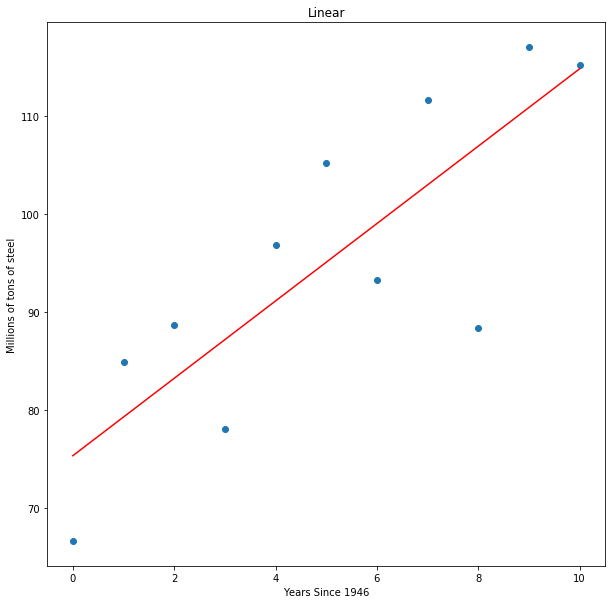

In [139]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(111)
ax1.scatter(x_vec, y)
line = ax1.plot(x_vec, y_lin, 'red')
ax1.set_title("Linear")
ax1.set_xlabel("Years Since 1946")
ax1.set_ylabel("Millions of tons of steel")

### Quadratic

In [140]:
X = np.block([x_vec ** 0, x_vec, x_vec **2])

In [141]:
z_vec = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
z_vec

array([[72.89020979],
       [ 5.55592075],
       [-0.16095571]])

In [142]:
y_quad = [z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 for x in x_vec]

In [143]:
x=11
predicted_quad = z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 
predicted_quad

array([114.52969697])

Text(0,0.5,'Millions of tons of steel')

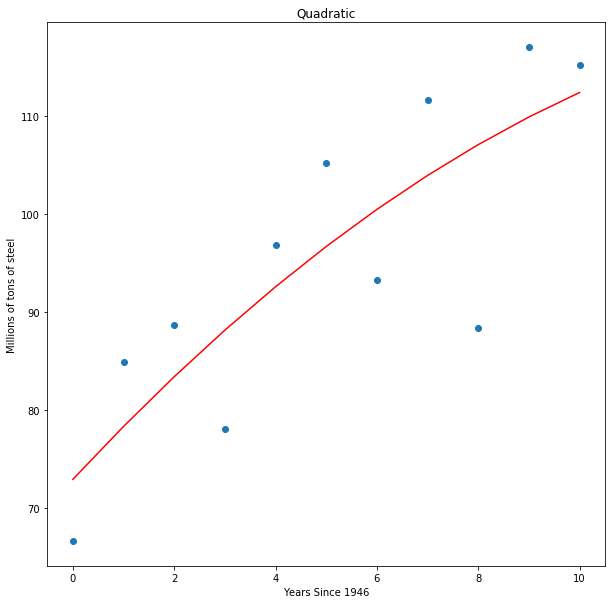

In [144]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(111)
ax1.scatter(x_vec, y)
line = ax1.plot(x_vec, y_quad, 'red')
ax1.set_title("Quadratic")
ax1.set_xlabel("Years Since 1946")
ax1.set_ylabel("Millions of tons of steel")

### Cubic

In [145]:
X = np.block([x_vec ** 0, x_vec, x_vec **2, x_vec ** 3])

In [146]:
z_vec = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
z_vec

array([[69.04685315],
       [11.66258741],
       [-1.76235431],
       [ 0.10675991]])

In [147]:
y_cube = [z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 + z_vec[3] * x ** 3 for x in x_vec]

In [148]:
x=11
predicted_cube = z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 + z_vec[3] * x ** 3 
predicted_cube

array([126.18787879])

Text(0,0.5,'Millions of tons of steel')

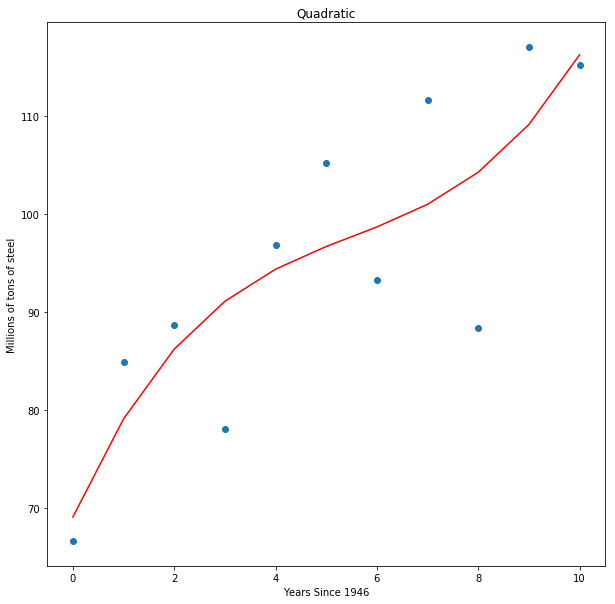

In [149]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(111)
ax1.scatter(x_vec, y)
line = ax1.plot(x_vec, y_cube, 'red')
ax1.set_title("Quadratic")
ax1.set_xlabel("Years Since 1946")
ax1.set_ylabel("Millions of tons of steel")

### Quartic

In [150]:
X = np.block([x_vec ** 0, x_vec, x_vec **2, x_vec ** 3, x_vec ** 4])

In [151]:
z_vec = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
z_vec

array([[69.45804196],
       [10.23484848],
       [-1.04848485],
       [-0.00745921],
       [ 0.00571096]])

In [152]:
y_quart = [z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 + z_vec[3] * x ** 3 + z_vec[4] * x ** 4 for x in x_vec]

In [153]:
x=11
predicted_quart = z_vec[0] + z_vec[1] * x + z_vec[2] * x**2 + z_vec[3] * x ** 3 + z_vec[4] * x ** 4 
predicted_quart

array([128.86060606])

Text(0,0.5,'Millions of tons of steel')

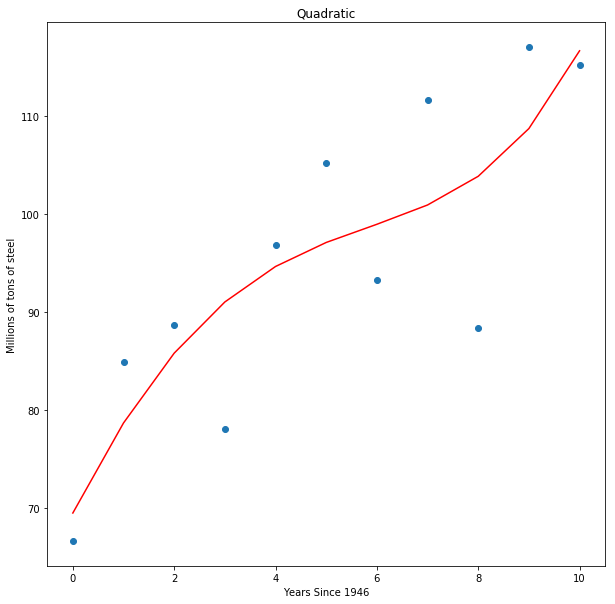

In [154]:
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(111)
ax1.scatter(x_vec, y)
line = ax1.plot(x_vec, y_quart, 'red')
ax1.set_title("Quadratic")
ax1.set_xlabel("Years Since 1946")
ax1.set_ylabel("Millions of tons of steel")

### All Plots

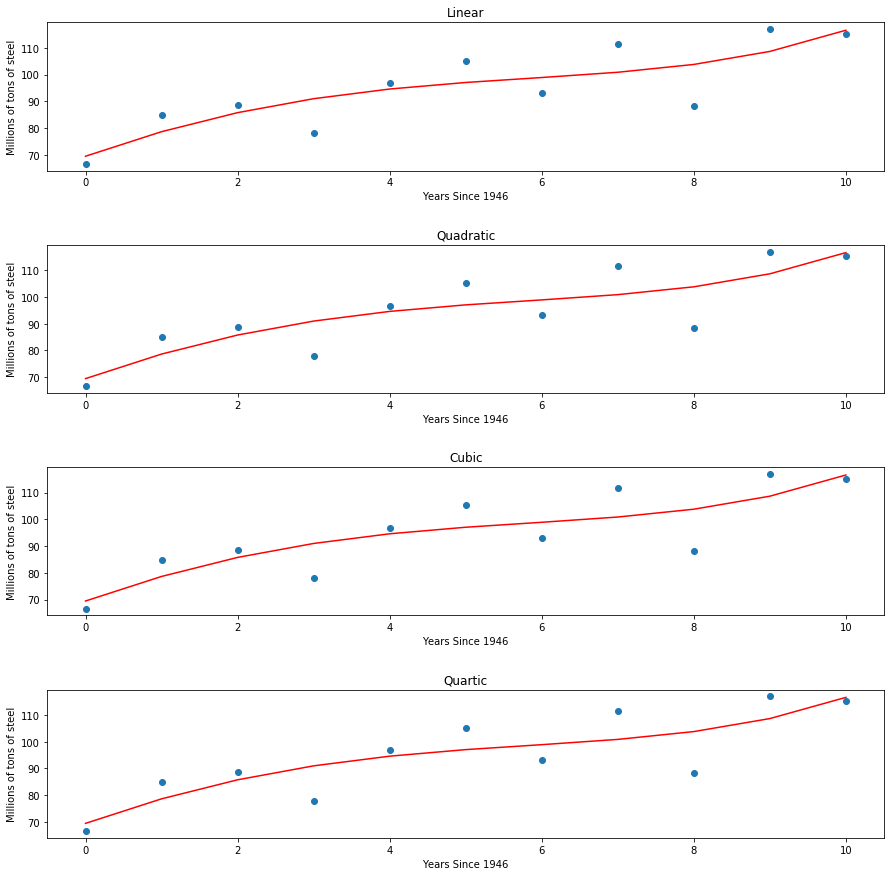

In [171]:
fig = plt.figure(figsize = (15, 15))
ax1 = plt.subplot(411)
ax1.scatter(x_vec, y)
line = ax1.plot(x_vec, y_quart, 'red')
ax1.set_title("Linear")
ax1.set_xlabel("Years Since 1946")
ax1.set_ylabel("Millions of tons of steel")

ax2 = plt.subplot(412)
ax2.scatter(x_vec, y)
ax2.plot(x_vec, y_quart, 'red')
ax2.set_title("Quadratic")
ax2.set_xlabel("Years Since 1946")
ax2.set_ylabel("Millions of tons of steel")

ax3 = plt.subplot(413)
ax3.scatter(x_vec, y)
ax3.plot(x_vec, y_quart, 'red')
ax3.set_title("Cubic")
ax3.set_xlabel("Years Since 1946")
ax3.set_ylabel("Millions of tons of steel")

ax4 = plt.subplot(414)
ax4.scatter(x_vec, y)
ax4.plot(x_vec, y_quart, 'red')
ax4.set_title("Quartic")
ax4.set_xlabel("Years Since 1946")
ax4.set_ylabel("Millions of tons of steel")

fig.subplots_adjust(hspace=0.5)


In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
error_linear = np.sqrt(mean_squared_error(y, y_lin))
error_linear

8.782260011471472

In [157]:
error_quad = np.sqrt(mean_squared_error(y, y_quad))
error_quad

8.6664505490846

In [158]:
error_cube = np.sqrt(mean_squared_error(y, y_cube))
error_cube

8.288934149107925

In [159]:
error_quart = np.sqrt(mean_squared_error(y, y_quart))
error_quart

8.281564991690368

In [262]:
R = np.array([
    [8, 5.15, 6.5],
    [5.15, 5, -4.07],
    [6.5, -4.07, 50]
])

In [265]:
a_rand = np.random.multivariate_normal([0, 0, 0], R, 100)

/usr/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'Y2')

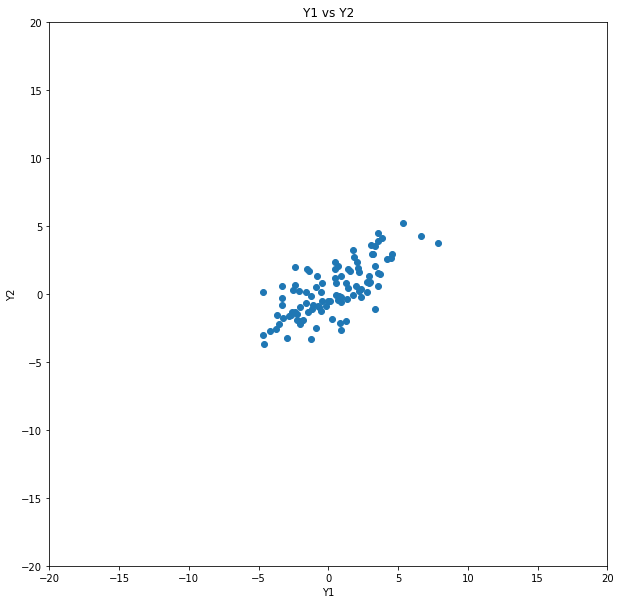

In [266]:
fig = plt.figure(figsize =(10, 10))
plt.title("Y1 vs Y2")
ax1 = plt.subplot(111)
ax1.scatter(a_rand[:, 0], a_rand[:, 1])
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_xlabel("Y1")
ax1.set_ylabel("Y2")

/usr/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-20, 20)

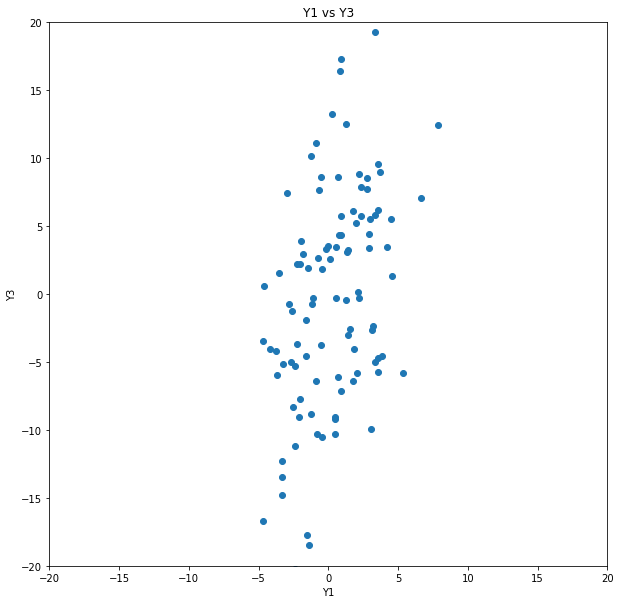

In [267]:
fig = plt.figure(figsize =(10, 10))
plt.title("Y1 vs Y3")
ax1 = plt.subplot(111)
ax1.scatter(a_rand[:, 0], a_rand[:, 2])
ax1.set_xlabel("Y1")
ax1.set_ylabel("Y3")
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)


/usr/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-20, 20)

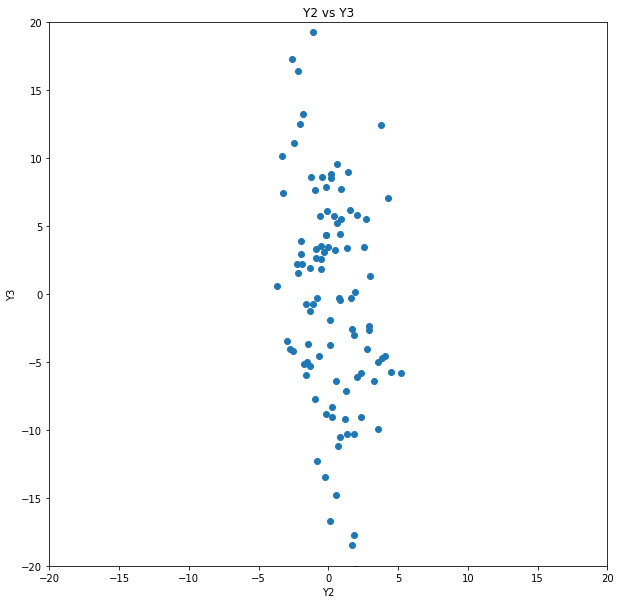

In [268]:
fig = plt.figure(figsize =(10, 10))
plt.title("Y2 vs Y3")
ax1 = plt.subplot(111)
ax1.scatter(a_rand[:, 1], a_rand[:, 2])
ax1.set_xlabel("Y2")
ax1.set_ylabel("Y3")
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)


(-20, 20)

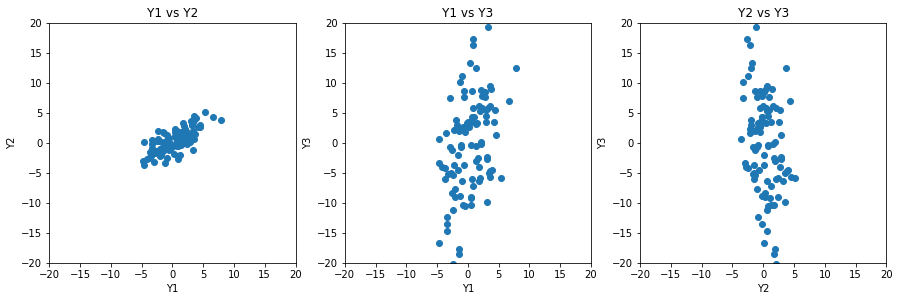

In [269]:
fig = plt.figure(figsize =(15, 15))
ax1 = plt.subplot(331)
ax1.set_title("Y1 vs Y2")
ax1.scatter(a_rand[:, 0], a_rand[:, 1])
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_xlabel("Y1")
ax1.set_ylabel("Y2")

ax2 = plt.subplot(332)
ax2.set_title("Y1 vs Y3")
ax2.scatter(a_rand[:, 0], a_rand[:, 2])
ax2.set_xlabel("Y1")
ax2.set_ylabel("Y3")
ax2.set_xlim(-20, 20)
ax2.set_ylim(-20, 20)

ax3 = plt.subplot(333)
ax3.scatter(a_rand[:, 1], a_rand[:, 2])
ax3.set_title("Y2 vs Y3")
ax3.set_xlabel("Y2")
ax3.set_ylabel("Y3")
ax3.set_xlim(-20, 20)
ax3.set_ylim(-20, 20)


In [270]:
np.cov(a_rand.transpose())

array([[ 7.07389093,  3.78040735,  8.81326019],
       [ 3.78040735,  3.85642286, -4.70848068],
       [ 8.81326019, -4.70848068, 64.24274192]])

In [271]:
np.ones(shape=(3, 1))

array([[1.],
       [1.],
       [1.]])

## Problem 4 C

In [272]:
def build_R(R, n):
    R_big=block_diag(R)
    for i in range(n-1):
        R_big = block_diag(R_big, R)
    return R_big

def build_H(dim, n):
    sub_H = np.eye(dim)
    H_list = [sub_H for i in range(n)]
    H = np.block(H_list)
    return H.transpose()



In [273]:
def Batch_LS(y_vec, R_in):
    H = build_H(y_vec.shape[1], y_vec.shape[0])
    print(H.shape)
    R = build_R(R_in, y_vec.shape[0])
    y = np.array([np.hstack(y_vec)]).transpose()
    htrh = np.linalg.inv(np.matmul(np.matmul(H.transpose(), np.linalg.inv(R)), H))  # (H^tR^-1H)^-1
    htry = np.matmul(np.matmul(H.transpose(), np.linalg.inv(R)), y)  # H^T R^-1 y
    x_hat = np.matmul(htrh, htry)
    return x_hat

In [274]:
Batch_LS(a_rand[:3, :], R)

(9, 3)


array([[ 0.03685522],
       [ 0.51608679],
       [-3.51109955]])

In [278]:
Batch_LS(a_rand, R)

(300, 3)


array([[ 0.3101779 ],
       [ 0.29328277],
       [-0.31604571]])

In [275]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [276]:
A = [np.eye(3) for i in range(5)]

In [217]:
A

[array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])]

In [220]:
B= np.block(A)

In [244]:
test = a_rand[:4, :]

In [245]:
test

array([[ 4.17813242,  2.76882904,  2.89448224],
       [-5.37606006, -3.81126229, -0.1455606 ],
       [-2.43858763, -1.05596863, -3.54827272],
       [-1.86617576, -2.74689453,  5.37844524]])

In [252]:
np.array([np.hstack(test)]).transpose()

array([[ 4.17813242],
       [ 2.76882904],
       [ 2.89448224],
       [-5.37606006],
       [-3.81126229],
       [-0.1455606 ],
       [-2.43858763],
       [-1.05596863],
       [-3.54827272],
       [-1.86617576],
       [-2.74689453],
       [ 5.37844524]])

In [226]:
from scipy.linalg import block_diag

In [232]:
test = [R for i in range(3)]

In [236]:
test = block_diag(R, R)

In [237]:
block_diag(test, R)

array([[ 8.  ,  5.15,  6.5 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 5.15,  5.  , -4.07,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 6.5 , -4.07, 50.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  8.  ,  5.15,  6.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  5.15,  5.  , -4.07,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  6.5 , -4.07, 50.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  8.  ,  5.15,  6.5 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  5.15,  5.  , -4.07],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.5 , -4.07, 50.  ]])

In [240]:
test = block_diag(R)

In [241]:
block_diag(test, R)

array([[ 8.  ,  5.15,  6.5 ,  0.  ,  0.  ,  0.  ],
       [ 5.15,  5.  , -4.07,  0.  ,  0.  ,  0.  ],
       [ 6.5 , -4.07, 50.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  8.  ,  5.15,  6.5 ],
       [ 0.  ,  0.  ,  0.  ,  5.15,  5.  , -4.07],
       [ 0.  ,  0.  ,  0.  ,  6.5 , -4.07, 50.  ]])